<a href="https://colab.research.google.com/github/rakhmadidev/capstoneProject2/blob/main/capstoneModul2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ardhon Rakhmadi - JCDSVL 07 - 
Airline Passenger Satisfaction

## Latar Belakang
Perusahaan Airline telah melakukan survei terhadap para customer. Dari hasil survey ternyata masih banyak yang tidak puas terhadap pelayanan dari Perusahaan Airline tersebut

## Pernyataan Masalah
Perusahaan ingin mengetahui detail-detail insight apa saja yang bisa digali dari hasil survey kepuasan customer. Perusahaan ingin mengetahui fasilitas apa saja yang bisa dievaluasi agar semua customer puas dengan pelayanan airline.

Data analyst akan melakukan analisa untuk mencoba menjawab pertanyaan berikut:
**Faktor-faktor apa saja yang membedakan customer yang puas dan tidak puas dengan pelayanan airline ?**

## Data Understanding

Data yang dianalisa adalah data survey yang dilakukan perusahaan terhadap customer

Langkah pertama import semua library python yang dibutuhkan

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kemudian masukkan data survey ke sebuah dataframe yang bernama df_airline

In [28]:
path = "/content/drive/MyDrive/Colab Notebooks/airline passanger satisfaction.csv"
df_airline = pd.read_csv(path)
df_airline

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [29]:
df_airline.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [30]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Ada 25 Kolom pada dataset survey ini yaitu:



*   Unnamed: 0 -> Nomor urut dari dataset ini
*   id -> Nomor unik masing-masing customer yang disurvey
*   Gender -> Jenis kelamin customer (Male atau Female)
*   Age -> Umur Customer (Dari rentang 7 tahun sampai 85 tahun)
*   Type of Travel -> Jenis Perjalanan (Personal Travel atau Business travel)
*   Class -> Kelas Penerbangan yang diambil (Eco Plus atau Business atau Eco)
*   Flight Distance -> Jarak Penerbangan yang diambil
*   Inflight wifi service -> Tingkat kepuasan terhadap layanan wifi dipesawat (dalam skala 0-5)
*   Departure/Arrival time convenient	-> Tingkat kepuasan terhadap waktu kedatangan/keberangkatan (dalam skala 0-5)
*   Ease of Online booking -> Tingkat kepuasan terhadap fasilitas online booking (dalam skala 0-5)
*   Gate location -> Tingkat kepuasan terhadap lokasi gate (dalam skala 0-5)
*   Food and drink -> Tingkat kepuasan terhadap makanan dan minuman (dalam skala 0-5)
*   Online boarding -> Tingkat kepuasan terhadap fasilitas online boarding (dalam skala 0-5)
*   Seat comfort -> Tingkat kepuasan terhadap kenyamanan kursi penumpang (dalam skala 0-5)
*   Inflight entertainment -> Tingkat kepuasan terhadap kenyamanan kursi penumpang (dalam skala 0-5)
*   On-board service -> Tingkat kepuasan terhadap on-board service (dalam skala 0-5)
*   Leg room service -> Tingkat kepuasan terhadap ruang gerak kaki dipesawat (dalam skala 0-5)
*   Baggage handling -> Tingkat kepuasan terhadap fasilitas bagasi (dalam skala 0-5)
*   Checkin service -> Tingkat kepuasan terhadap layanan check in (dalam skala 0-5)
*   Inflight service -> Tingkat kepuasan terhadap layanan pramugari dipesawat (dalam skala 0-5)
*   Cleanliness	-> Tingkat kepuasan terhadap kebersihan pesawat (dalam skala 0-5)
*   Departure Delay in Minutes -> Waktu Delay Keberangkatan dalam menit
*   Arrival Delay in Minutes -> Waktu Delay Kedatangan dalam menit
*   satisfaction -> Kepuasan customer (neutral or dissatisfied atau satisfied)


















Berikut adalah summary dari dataset airline yang sudah kita masukkan kedalam dataframe df_airline :

*   Dataset airline terdiri dari 103904 baris × 25 kolom
*   Kolom Unnamed: 0 berisi nomor urut  masing-masing customer yang disurvey, bisa kita hapus karena tidak relevan dengan analisa yang akan dilakukan.
*   Pada kolom *Arrival Delay in Minutes* terdapat data yang kosong yang direpresentasikan dengan nan. Perlu dilakukan treatment terhadap data kosong ini agar analisa yang dilakukan valid
*   Skala 0-5 artinya semakin rendah nilainya maka semakin tidak puas sedangkan semakin tinggi nilainya maka customer semakin puas
*   Pelanggan yang puas direpresentasikan pada kolom satisfaction yang memiliki nilai kategorikal satisfied. Sedangkan pelanggan yang tidak puas direpresentasikan pada kolom satisfaction yang memiliki nilai kategorikal neutral or dissatisfied 








## Data Cleaning

Pada dataset airline terdapat kolom yang tidak relevan dengan tujuan analisa yaitu kolom Unnamed: 0, Kolom ini dihapus karena tidak relevan dengan analisa

In [31]:
df_airline.drop('Unnamed: 0', inplace=True, axis=1)

In [32]:
df_airline

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Kemudian pada dataset terdapat kolom yang memiliki data kosong. Data kosong pada dataframe direpresentasikan dengan nan. Data kosong ini perlu diisi karena dapat mempengaruhi hasil analisa.

Visualisasikan persebaran data yang kosong dengan menggunakan heatmap dari seaborn. Dari visualisasi kita dapat melihat bahwa data kosong terdapat pada kolom Arrival Delay in Minutes

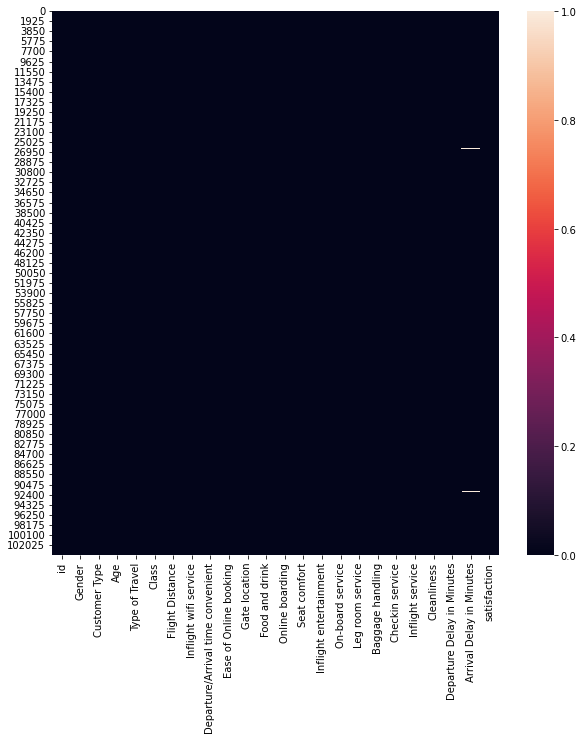

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df_airline.isna())

Double check dengan menggunakan fungsi isna().value_counts() untuk mengetahui berapa jumlah data yang kosong. Dari hasil value_counts() yang sudah dijalankan diketahui bahwa data kosong terdapat sebanyak 310 pada kolom Arrival Delay in Minutes di dataframe df_airline

In [34]:
print(df_airline.isna().value_counts())

id     Gender  Customer Type  Age    Type of Travel  Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction
False  False   False          False  False           False  False            False                  False                              False                   False          False           False            False         False                   False             False             False             False            False             False        False                       False                     False           103594
                                                                                                                                                                  

Salah satu strategi untuk pengisian data yang kosong bisa menggunakan modus, mean atau median. Namun perlu diketahui dulu persebaran datanya sebelum kita bisa mengisi data kosong tersebut.

Dari visualisasi seaborn distplot dan boxplot dapat kita lihat bahwa distribusi data kolom Arrival Delay in Minutes adalah distribusi tidak normal dan positively skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


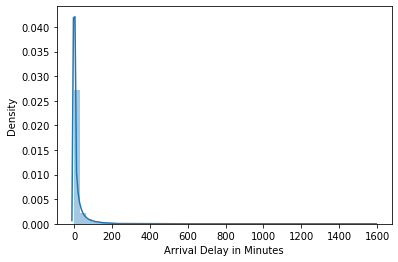

In [35]:
sns.distplot(df_airline['Arrival Delay in Minutes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


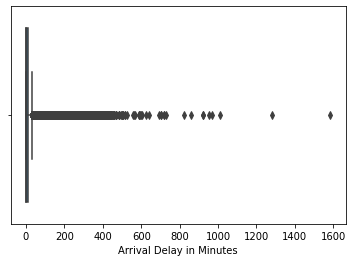

In [36]:
sns.boxplot(df_airline['Arrival Delay in Minutes'])

Strategi untuk mengisi data yang tidak terdistribusi normal adalah median. sehingga dapat menggunakan fungsi fillna() yang dikombinasikan dengan median dari kolom Arrival Delay in Minutes

In [37]:
df_airline['Arrival Delay in Minutes'].median()

0.0

In [38]:
df_airline['Arrival Delay in Minutes'] = df_airline['Arrival Delay in Minutes'].fillna(df_airline['Arrival Delay in Minutes'].median())

Kemudian dapat dicek sekali lagi dengan menggunakan fungsi isna().value_counts() untuk memastikan bahwa sudah tidak ada lagi data kosong pada dataframe df_airline

In [39]:
print(df_airline.isna().value_counts())

id     Gender  Customer Type  Age    Type of Travel  Class  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction
False  False   False          False  False           False  False            False                  False                              False                   False          False           False            False         False                   False             False             False             False            False             False        False                       False                     False           103904
dtype: int64


Persebaran data kosong bisa divisualisasikan kembali untuk memastikan sudah tidak ada lagi data kosong pada dataframe df_airline

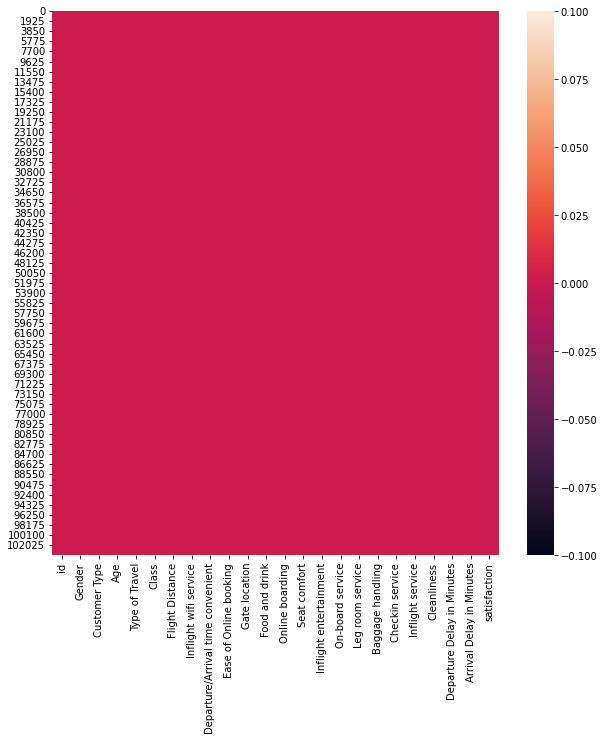

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df_airline.isna())

Data yang sudah dibersihkan diekspor kedalam excel agar dapat dibaca tableau

In [41]:
# from google.colab import files
# df_airline.to_excel('df_airline.xlsx') 
# files.download('df_airline.xlsx')

## Data Visualisation

Dengan menggunakan tableau kita dapat membuat visualisasi agar data semakin mudah untuk dianalisa. Visualisasi yang dibuat untuk mengetahui faktor-faktor apa saja yang membedakan customer yang puas dan tidak terhadap airline

Dari visualisasi tableau Loyalitas Berdasarkan Golongan Umur dapat dilihat bahwa semua golongan umur (Age Bin) lebih banyak yang loyal terhadap airline. Golongan umur 20-29 tahun adalah golongan umur yang customer tidak loyalnya paling banyak yaitu sebanyak 9630 yang tidak loyal terhadap airline

https://public.tableau.com/views/CapstoneModul2_16653191669570/Sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [51]:
%%html
<div class='tableauPlaceholder' id='viz1665369608303' style='position: relative'><noscript><a href='#'><img alt='Loyalitas Berdasarkan Golongan Umur ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneModul2_16653191669570&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665369608303');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Kita dapat membuat visualiasi Kepuasan Berdasarkan Golongan Umur. Dari visualisasi dapat kita lihat mayoritas customer adalah customer yang loyal, tapi dari visualisasi tableau Kepuasaan Berdasarkan Golongan Umur dapat dilihat bahwa hampir semua golongan umur (age bin) lebih banyak menyatakan bahwa tidak puas terhadap service yang diberikan kepada airline. Golongan umur lebih banyak menyatakan yang puas terhadap pelayanan airline adalah golongan umur 40-49 dan 50-59 tahun.

https://public.tableau.com/views/CapstoneModul2_16653191669570/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link

In [52]:
%%html
<div class='tableauPlaceholder' id='viz1665368893921' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneModul2_16653191669570&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665368893921');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Kita bisa melihat detail jumlah customer yang puas dan tidak puas dengan menggunakan visualisasi treemap. Dari visualisasi tableau treemap yang dibuat dapat dilihat bahwa jumlah customer loyal yang tidak puas (44390 orang) lebih banyak daripada jumlah customer tidak loyal yang tidak puas (40533 orang)

https://public.tableau.com/views/CapstoneModul2_16653191669570/Sheet3?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [45]:
%%html
<div class='tableauPlaceholder' id='viz1665370319847' style='position: relative'><noscript><a href='#'><img alt='Jumlah Customer Berdasarkan Loyalitas Dan Kepuasan ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneModul2_16653191669570&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665370319847');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Kita dapat membuat visualisasi untuk analisa Pengaruh Arrival Dan Departure Delay Terhadap Kepuasan Customer. Dari visualisasi Pengaruh Arrival Dan Departure Delay Terhadap Kepuasan Customer dapat dilihat bahwa customer yang puas adalah customer yang waktu rata-rata Arrival atau Delay 12,5 menit. Sedangkan customer yang yang tidak puas adalah customer yang waktu rata-rata Arrival atau Delay 16,5 menit

https://public.tableau.com/views/CapstoneModul2_16653191669570/Sheet5?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [46]:
%%html
<div class='tableauPlaceholder' id='viz1665371419234' style='position: relative'><noscript><a href='#'><img alt='Pengaruh Arrival Dan Departure Delay Terhadap Kepuasan Customer ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneModul2_16653191669570&#47;Sheet5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Sheet5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665371419234');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Kemudian untuk mengetahui detail penilaian dari masing-masing service oleh customer. Kita dapat menggunakan fungsi groupby dan np.mean yang akan menghitung nilai rata-rata penilaian customer berdasarkan service dan tingkat kepuasannya (satisfaction). Sehingga dapat diketahui detail rata-rata penilaian (score) masing-masing service yang membuat customer puas atau tidak puas. 

In [47]:
df1 = pd.DataFrame(columns=['service','satisfaction', 'id', 'score'])
df_score = pd.DataFrame(columns=['service','satisfaction', 'id', 'score'])

for col in ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'] :

       df1 = df_airline.groupby(["satisfaction"]).agg({"id":len,col:np.mean}).reset_index().sort_values([col], ascending=[False])
       df1.rename(columns = {col:'score'}, inplace = True)
       df1['service'] = col
       df_score = pd.concat([df_score, df1], 
                  ignore_index = True)
df_score.drop('id', inplace=True, axis=1)
df_score.sort_values(['score'], ascending=[True])

,service,satisfaction,score
1,Inflight wifi service,neutral or dissatisfied,2.399633
5,Ease of Online booking,neutral or dissatisfied,2.546850
11,Online boarding,neutral or dissatisfied,2.656125
15,Inflight entertainment,neutral or dissatisfied,2.894156
27,Cleanliness,neutral or dissatisfied,2.936123
9,Food and drink,neutral or dissatisfied,2.958050
3,Departure/Arrival time convenient,satisfied,2.970305
7,Gate location,neutral or dissatisfied,2.976121
6,Gate location,satisfied,2.977879
19,Leg room service,neutral or dissatisfied,2.990812


Hasil perhitungan rata-rata penilaian service ini yang disimpan dalam dataframe dan diekspor kedalam file xlsx agar dapat dibaca oleh tableau

In [48]:
# from google.colab import files
# df_score.to_excel('df_score.xlsx') 
# files.download('df_score.xlsx')

Kita dapat membuat visualisasi untuk analisa Penilaian Customer Terhadap Service Airline. Dari visualisasi Penilaian Customer Terhadap Service Airline dapat dilihat bahwa service inflight wifi service memiliki penilaian yang paling rendah yaitu 2,3996

https://public.tableau.com/views/CapstoneModulDua/Sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [53]:
%%html
<div class='tableauPlaceholder' id='viz1665371918557' style='position: relative'><noscript><a href='#'><img alt='Penilaian Customer Terhadap Service Airline ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModulDua&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneModulDua&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModulDua&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665371918557');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Dari beberapa visualiasi yang sudah dibuat dapat dibuat dashboard agar semakin mempermudah analisa dari beberapa visualisasi tersebut.

https://public.tableau.com/views/CapstoneModul2_16653191669570/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [50]:
%%html
<div class='tableauPlaceholder' id='viz1665372849741' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;CapstoneModul2_16653191669570&#47;Dashboard1?:language=en-US&amp;:embed=true&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneModul2_16653191669570&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665372849741');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.height='1187px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.height='1187px';} else { vizElement.style.width='100%';vizElement.style.height='1177px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Kesimpulan

Dari beberapa visualisasi yang telah dilakukan. Maka didapatkan beberapa kesimpulan sebagai berikut :

*  Semua golongan umur (Age Bin) lebih banyak yang loyal terhadap airline. Golongan umur 20-29 tahun adalah golongan umur yang customer tidak loyalnya paling banyak yaitu sebanyak 9630 yang tidak loyal terhadap airline
*   Meskipun dari visualiasi Loyalitas Berdasarkan Golongan Umur mayoritas customer adalah customer yang loyal, tapi dari visualisasi tableau Kepuasaan Berdasarkan Golongan Umur dapat dilihat bahwa hampir semua golongan umur (age bin) lebih banyak menyatakan bahwa tidak puas terhadap service yang diberikan kepada airline. Golongan umur lebih banyak menyatakan yang puas terhadap pelayanan airline adalah golongan umur 40-49 dan 50-59 tahun.
*   Jumlah customer loyal yang tidak puas (44390 orang) lebih banyak daripada jumlah customer loyal yang puas (40533 orang)
*   Customer yang puas adalah customer yang waktu rata-rata Arrival atau Delay 12,5 menit. Sedangkan customer yang yang tidak puas adalah customer yang waktu rata-rata Arrival atau Delay 16,5 menit
*   Dari rata-rata penilaian dari customer, beberapa service mendapatkan penilaian yang rendah dari customer yaitu inflight wifi service, Ease of Online booking dan Online boarding





## Rekomendasi

Dari beberapa kesimpulan yang diambil. Maka data analyst dapat membuat beberapa rekomendasi untuk airline yaitu :
*   Memperbanyak promo untuk golongan umur 20-29 tahun karena golongan umur 20-29 tahun adalah golongan umur yang paling tidak loyal terhadap airline
*   Memperbanyak reward untuk golongan umur 40-49 dan 50-59 tahun karena golongan umur ini adalah golongan umur yang paling puas terhadap pelayanan airline
*   Waktu Delay untuk Arrival atau Departure harus dijaga agar tidak sampai melebihi 12,5 menit karena rata-rata customer yang puas adalah 12,5 menit untuk waktu delaynya
*   Beberapa service harus dievaluasi secara serius terutama inflight wifi service, Ease of Online booking dan Online boarding karena service ini memiliki penilaian kepuasan yang sangat rendah apabila dibandingkan dengan service-service yang lainnya


